# WeatherPy

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sts

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "Imperial"
api_key = weather_api_key 
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&units={units}&q="
#         city_url = url + "&q=" + i + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
        
        #print(city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
#         print(city_lat)
        city_lng = city_weather["coord"]["lon"]
#         print(city_lng)
        city_max_temp = city_weather["main"]["temp_max"]
#         print(city_max_temp)
        city_humidity = city_weather["main"]["humidity"]
#         print(city_humidity)
        city_clouds = city_weather["clouds"]["all"]
#         print(city_clouds)
        city_wind = city_weather["wind"]["speed"]
#         print(city_wind)
        city_country = city_weather["sys"]["country"]
#         print(city_country)
#         city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        city_date = city_weather["dt"]
#         print(city_date)
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
        time.sleep(1)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | puerto ayacucho
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | kawana waters
City not found. Skipping...
Processing Record 10 of Set 1 | dudinka
Processing Record 11 of Set 1 | yatou
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | mitu
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | sangar
Processing Record 16 of Set 1 | padang
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | samusu
City not found. Skipping...
Processing Record 20 of Set 1 | mao
Processing Record 21 of Set 1 | najran
Pr

Processing Record 38 of Set 4 | pangnirtung
Processing Record 39 of Set 4 | tarudant
City not found. Skipping...
Processing Record 40 of Set 4 | saldanha
Processing Record 41 of Set 4 | faanui
Processing Record 42 of Set 4 | santa lucia
Processing Record 43 of Set 4 | talara
Processing Record 44 of Set 4 | nurota
Processing Record 45 of Set 4 | jodiya
Processing Record 46 of Set 4 | sao borja
Processing Record 47 of Set 4 | ubinskoye
Processing Record 48 of Set 4 | pundaguitan
Processing Record 49 of Set 4 | sao filipe
Processing Record 0 of Set 5 | kaitangata
Processing Record 1 of Set 5 | sasovo
Processing Record 2 of Set 5 | bonfim
Processing Record 3 of Set 5 | yulara
Processing Record 4 of Set 5 | tahe
Processing Record 5 of Set 5 | skelleftea
Processing Record 6 of Set 5 | ixtapa
Processing Record 7 of Set 5 | saskylakh
Processing Record 8 of Set 5 | yar-sale
Processing Record 9 of Set 5 | krasnoselkup
Processing Record 10 of Set 5 | namibe
Processing Record 11 of Set 5 | punta a

Processing Record 27 of Set 8 | hambantota
Processing Record 28 of Set 8 | nioro
Processing Record 29 of Set 8 | raudeberg
Processing Record 30 of Set 8 | beringovskiy
Processing Record 31 of Set 8 | trincomalee
Processing Record 32 of Set 8 | kruisfontein
Processing Record 33 of Set 8 | northam
Processing Record 34 of Set 8 | roald
Processing Record 35 of Set 8 | santiago
Processing Record 36 of Set 8 | lockhart
Processing Record 37 of Set 8 | kismayo
Processing Record 38 of Set 8 | margate
Processing Record 39 of Set 8 | rio cuarto
Processing Record 40 of Set 8 | porto santo
Processing Record 41 of Set 8 | atakpame
Processing Record 42 of Set 8 | mantua
Processing Record 43 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 44 of Set 8 | zhuanghe
Processing Record 45 of Set 8 | quelimane
Processing Record 46 of Set 8 | a
City not found. Skipping...
Processing Record 47 of Set 8 | salalah
Processing Record 48 of Set 8 | daru
Processing Record 49 of Set 8 | nanakuli
Proc

Processing Record 15 of Set 12 | naftah
City not found. Skipping...
Processing Record 16 of Set 12 | ilulissat
Processing Record 17 of Set 12 | ndouci
City not found. Skipping...
Processing Record 18 of Set 12 | wilmington
Processing Record 19 of Set 12 | murmashi
Processing Record 20 of Set 12 | beian
Processing Record 21 of Set 12 | bathsheba
Processing Record 22 of Set 12 | ca mau
Processing Record 23 of Set 12 | linfen
Processing Record 24 of Set 12 | praia
Processing Record 25 of Set 12 | saint anthony
Processing Record 26 of Set 12 | huatulco
Processing Record 27 of Set 12 | shangrao
Processing Record 28 of Set 12 | naica
Processing Record 29 of Set 12 | pinsk
Processing Record 30 of Set 12 | henties bay
Processing Record 31 of Set 12 | lano
Processing Record 32 of Set 12 | belyy yar
Processing Record 33 of Set 12 | okhotsk
Processing Record 34 of Set 12 | flinders
Processing Record 35 of Set 12 | apac
Processing Record 36 of Set 12 | marsh harbour
Processing Record 37 of Set 12 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,79.11,76,0,5.75,US,1671301957
1,puerto ayacucho,5.6639,-67.6236,90.21,44,48,4.21,VE,1671301958
2,jamestown,42.0970,-79.2353,33.39,59,100,10.36,US,1671301842
3,nikolskoye,59.7035,30.7861,-4.43,100,65,0.22,RU,1671301961
4,arraial do cabo,-22.9661,-42.0278,76.96,83,75,18.41,BR,1671301962


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,79.11,76,0,5.75,US,1671301957
1,puerto ayacucho,5.6639,-67.6236,90.21,44,48,4.21,VE,1671301958
2,jamestown,42.0970,-79.2353,33.39,59,100,10.36,US,1671301842
3,nikolskoye,59.7035,30.7861,-4.43,100,65,0.22,RU,1671301961
4,arraial do cabo,-22.9661,-42.0278,76.96,83,75,18.41,BR,1671301962


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

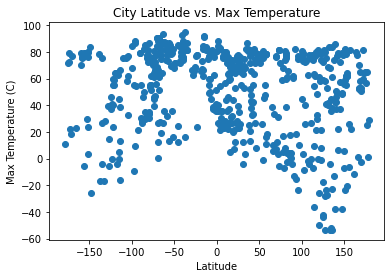

In [80]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x = city_data_df.iloc[:, 2]
y = city_data_df.iloc[:, 3]
plt.scatter(x,y)
# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Latitude vs. Max Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

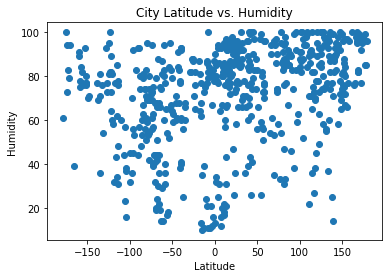

In [81]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x = city_data_df.iloc[:, 2]
y = city_data_df.iloc[:, 4]
plt.scatter(x,y)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude vs. Humidity")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()



#### Latitude Vs. Cloudiness

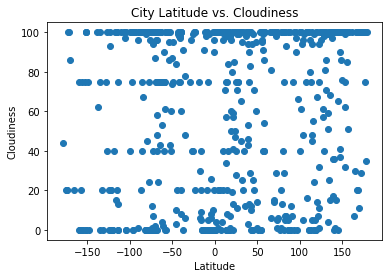

In [82]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x = city_data_df.iloc[:, 2]
y = city_data_df.iloc[:, 5]
plt.scatter(x,y)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude vs. Cloudiness")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

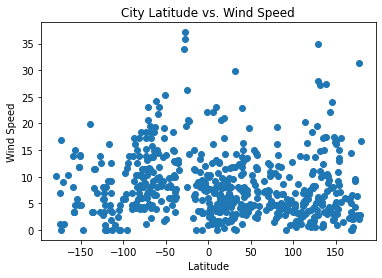

In [83]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x = city_data_df.iloc[:, 2]
y = city_data_df.iloc[:, 6]
plt.scatter(x,y)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Latitude vs. Wind Speed")
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def LR_plot(x_values,y_values):
    correlation = sts.pearsonr(x_values,y_values)
    
    print(f"""The r-squared value is {round((correlation[0]**2),2)}""")
# Add the linear regression equation and line to plot

    (slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    return line_eq

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,79.11,76,0,5.75,US,1671301957
1,puerto ayacucho,5.6639,-67.6236,90.21,44,48,4.21,VE,1671301958
2,jamestown,42.0970,-79.2353,33.39,59,100,10.36,US,1671301842
3,nikolskoye,59.7035,30.7861,-4.43,100,65,0.22,RU,1671301961
7,dudinka,69.4058,86.1778,1.60,89,100,11.86,RU,1671301967


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,arraial do cabo,-22.9661,-42.0278,76.96,83,75,18.41,BR,1671301962
5,bluff,-46.6000,168.3333,52.81,82,100,14.47,NZ,1671301964
6,port alfred,-33.5906,26.8910,67.17,91,100,8.03,ZA,1671301965
13,padang,-0.9492,100.3543,77.05,88,100,3.58,ID,1671301714
14,carnarvon,-24.8667,113.6333,73.87,71,0,20.36,AU,1671301976


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is 0.73


Text(0.5, 1.0, 'Northern Temperature vs. Latitude')

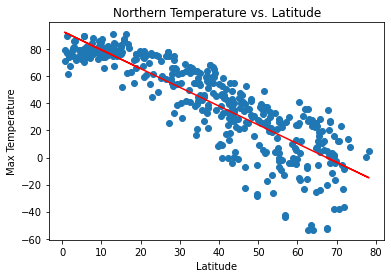

In [72]:
# # Linear regression on Northern Hemisphere
Best_fit_line = LR_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.annotate(Best_fit_line,(-40, 10), color="red", fontsize=15);
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.title('Northern Temperature vs. Latitude')

The r-squared value is 0.3


Text(0.5, 1.0, 'Southern Temperature vs. Latitude')

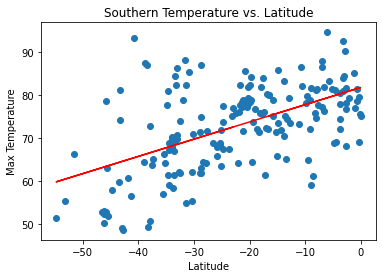

In [73]:
# Linear regression on Southern Hemisphere
South_Best_fit_line = LR_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.annotate(Best_fit_line,(75, -50), color="red", fontsize=15);
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.title('Southern Temperature vs. Latitude')

**Discussion about the linear relationship:**  In the northern hemisphere there is a strong negative correlation between the variables. In the southern hemisphere, there is a weak positive correlation between temperature and latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is 0.22


Text(0.5, 1.0, 'Northern Humidity vs. Latitude')

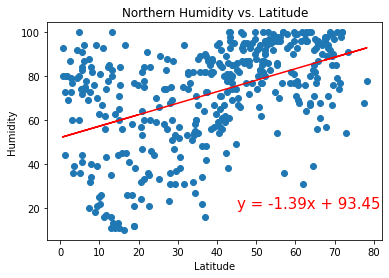

In [74]:
# Northern Hemisphere
North_Humid_Best_fit_line = LR_plot(y_values=northern_hemi_df["Humidity"], x_values=northern_hemi_df["Lat"])
plt.annotate(Best_fit_line,(45, 20), color="red", fontsize=15);
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('Northern Humidity vs. Latitude')


The r-squared value is 0.04


Text(0.5, 1.0, 'Southern Humidity vs. Latitude')

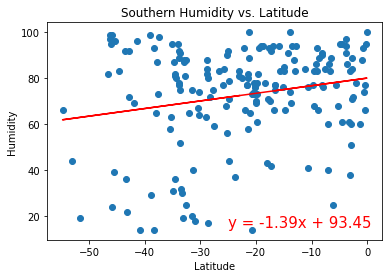

In [75]:
# Southern Hemisphere
South_Humid_Best_fit_line = LR_plot(y_values=southern_hemi_df["Humidity"], x_values=southern_hemi_df["Lat"])
plt.annotate(Best_fit_line,(-25, 15), color="red", fontsize=15);
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('Southern Humidity vs. Latitude')

**Discussion about the linear relationship:** In the northern hemisphere there is a weak positive correlation between humidity and latitude. In the southern hemisphere there is no correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is 0.02


Text(0.5, 1.0, 'Northern Cloudiness vs. Latitude')

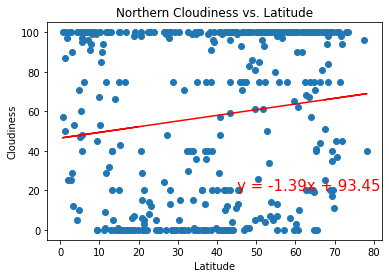

In [76]:
# Northern Hemisphere
North_Cloud_Best_fit_line = LR_plot(y_values=northern_hemi_df["Cloudiness"], x_values=northern_hemi_df["Lat"])
plt.annotate(Best_fit_line,(45, 20), color="red", fontsize=15);
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Northern Cloudiness vs. Latitude')

The r-squared value is 0.01


Text(0.5, 1.0, 'Northern Cloudiness vs. Latitude')

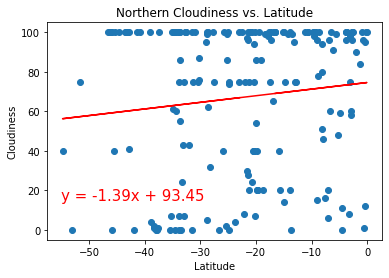

In [77]:
# Southern Hemisphere
South_Cloud_Best_fit_line = LR_plot(y_values=southern_hemi_df["Cloudiness"], x_values=southern_hemi_df["Lat"])
plt.annotate(Best_fit_line,(-55, 15), color="red", fontsize=15);
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Northern Cloudiness vs. Latitude')

**Discussion about the linear relationship:** There is a no correlation between cloudiness and latitute in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is 0.01


Text(0.5, 1.0, 'Northern Wind Speed vs. Latitude')

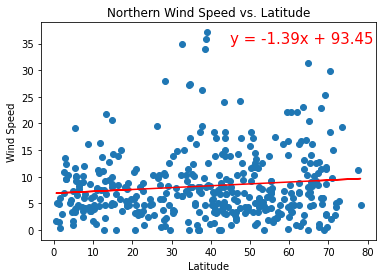

In [78]:
# Northern Hemisphere
North_Wind_Best_fit_line = LR_plot(y_values=northern_hemi_df["Wind Speed"], x_values=northern_hemi_df["Lat"])
plt.annotate(Best_fit_line,(45, 35), color="red", fontsize=15);
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('Northern Wind Speed vs. Latitude')

The r-squared value is 0.07


Text(0.5, 1.0, 'Southern Wind Speed vs. Latitude')

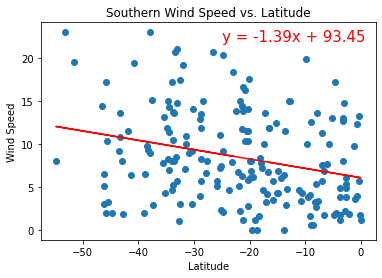

In [79]:
# Southern Hemisphere
South_Wind_Best_fit_line = LR_plot(y_values=southern_hemi_df["Wind Speed"], x_values=southern_hemi_df["Lat"])
plt.annotate(Best_fit_line,(-25, 22), color="red", fontsize=15);
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('Southern Wind Speed vs. Latitude')

**Discussion about the linear relationship:** There is a no correlation between wind speed an latitude in the northern hemisphere. And a weak negative correlation in the southern hemisphere.